# Bike Data Analysis
## Notes on the Data
- Start Station Id is always an int, although Start Station Name may be NULL. 
  - What does NULL mean? insertion from repair?
  - 28228 / 200_000 rides have null start station; also roughly 28225 / 200_000 rides have null name end station
    - Hypothesis: No valid Id | System Error
    - Notably, in Feb - June data, there are no NaN end stations (all integers) 
      - possibly, the data format has changed
  - How are repairs, temporary bike removal modeled in the data?
  - When are bikes typically repaired? / relocated?
- End Station Id may be nan. What does that mean?
  - Note: 95 Nan End stations in Jan 2024 of roughly 200_000 rides total. Note: this is always station 9737
  - 
  - Hypothesis: Manual repositioning / repairs | repositioning.
- Note: files have `cp1252` encoding
- Note: Station IDs start at 7000


## Geospatial Analysis and Visualization
- Retrieve geospatial coordinates for the respective stations from the stations file or the current up-to-date station data from the other repo. (Check that ids match, otherwise match street names)
- 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = '../data/bikeshare-ridership-2024/Bike share ridership 2024-06.csv'


ridership_table = pd.read_csv("../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv", encoding='cp1252')
# for jan 2024 utf 8 encoding; other months cp1252

# Display the first few rows of the DataFrame
ridership_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685782 entries, 0 to 685781
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             685782 non-null  int64 
 1   Trip  Duration      685782 non-null  int64 
 2   Start Station Id    685782 non-null  int64 
 3   Start Time          685782 non-null  object
 4   Start Station Name  685748 non-null  object
 5   End Station Id      685782 non-null  int64 
 6   End Time            685782 non-null  object
 7   End Station Name    685744 non-null  object
 8   Bike Id             685782 non-null  int64 
 9   User Type           685782 non-null  object
 10  Model               685782 non-null  object
dtypes: int64(5), object(6)
memory usage: 57.6+ MB


In [2]:
ridership_table[ridership_table['Bike Id'].isna()]

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model


In [3]:
ridership_table[ridership_table['End Station Name'].isnull()].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model
661737,28803221,587,7030,05/31/2024 08:29,Bay St / Wellesley St W,7937,05/31/2024 08:39,NaN,1526,Annual Member,ICONIC
662291,28803841,429,7768,05/31/2024 08:47,Armoury St / Chestnut St,7937,05/31/2024 08:54,NaN,4262,Annual Member,ICONIC
662419,28803995,404,7443,05/31/2024 08:51,Dundas St E / George St,7937,05/31/2024 08:58,NaN,6476,Casual Member,ICONIC
662871,28804558,458,7467,05/31/2024 09:10,Lower Simcoe St / Bremner Blvd,7937,05/31/2024 09:18,NaN,5902,Casual Member,ICONIC
663474,28805288,399,7257,05/31/2024 09:43,Dundas St W / St. Patrick St,7937,05/31/2024 09:49,NaN,981,Casual Member,ICONIC


In [4]:
# Print the column headers of the bike_share_data DataFrame
print(ridership_table.columns)
row_names = ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type']

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type', 'Model'],
      dtype='object')


In [5]:
# get average trip duration
average_trip_duration_min = ridership_table['Trip  Duration'].mean() / 60
print(f"Average trip duration: {average_trip_duration_min:.2f} minutes")

Average trip duration: 19.13 minutes


In [17]:
if not 'an' in globals():
    print('importing analysis')
    import analysis as an
else:
    print('reloading analysis')
    import importlib
    importlib.reload(an)

process_data = True
reload_data = False

name = '2024-5'
file = '../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv'

# run gc to clear out space
import gc
gc.collect()

if process_data:
    ridership_table = pd.read_csv(file, encoding='cp1252')
    data = an.BikeShareData(name)
    data.process_data_and_save(ridership_table)

if reload_data:
    data = an.BikeShareData(name)
    data = an.BikeShareData.load_from_pickle(name = name)


reloading analysis
Loaded 994 stations
Preprocessing ridership table
Number of rows with NaN End Station Id: 685782


In [7]:
data.stations

,station_id,name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,47.0
1,7001,Wellesley Station Green P,43.664964,-79.383550,23.0
2,7002,St. George St / Bloor St W,43.667131,-79.399555,17.0
3,7003,Madison Ave / Bloor St W,43.667018,-79.402796,15.0
4,7004,Unknown,NaN,NaN,NaN
...,...,...,...,...,...
989,7989,Don Mills Rd / Fairview Mall Dr,43.778886,-79.348372,15.0
990,7990,Don Mills Rd / Goodview Rd,43.785346,-79.353629,15.0
991,7991,Kingston Rd / Markham Rd,43.738784,-79.217465,15.0
992,7992,Fairglen Cres / Weston Rd,43.708767,-79.534452,11.0


In [109]:
df = an.preprocess_ridership_table(ridership_table)

In [141]:
in_bikes, out_bikes = data._process_data_by_minute(df)
in_rates, out_rates = data.calculate_in_out_rates(σ_minutes=60) # 60 minutes is probably good


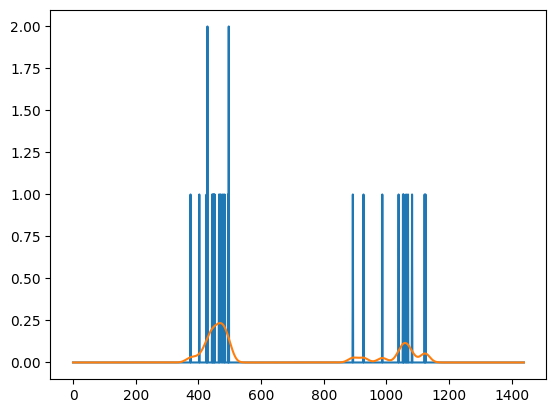

In [9]:
import matplotlib.pyplot as plt

time_range = range(0, 24 * 60)
station = 5

plt.plot(data.in_bikes[station, time_range]) # Station 7000 over the whole month
plt.plot(data.in_rates[station, time_range]) # look at the first day

In [18]:
# create a slider for the station
from ipywidgets import interact

N_stations = data.N_bikes.shape[0]
station = 7000
@interact(station=(0, N_stations - 1))
def plot_station(station):
    N_bikes = np.cumsum(data.in_bikes[station, :] - data.out_bikes[station, :])
    plt.plot(N_bikes[0 : 24 * 60 * 30])
    # get axes object of current plot
    ax = plt.gca()
    ax.set(xlabel='time (minutes)', ylabel='number of bikes', title=f'Bikes at {7000 + station}, {data.stations.loc[station, 'name']}, Cap: {data.stations.loc[station, 'capacity']}', )
    return ax

interactive(children=(IntSlider(value=496, description='station', max=993), Output()), _dom_classes=('widget-i…

In [24]:
station = 7496 - 7000

# calculate mins and maxes for each day of the month
N_bikes = np.cumsum(data.in_bikes[station, :] - data.out_bikes[station, :])
N_bikes = N_bikes[0 : 24 * 60 * 30] # note may has to be adjusted for different months

N_bikes = N_bikes.reshape(-1, 24 * 60)
mins = np.min(N_bikes, axis=1)
maxes = np.max(N_bikes, axis=1)

# calculate Δ: max_day - min_day
Δ = maxes - mins

most_frequent_value = np.bincount(Δ).argmax()
print(f"The most frequent value in Δ is: {most_frequent_value}")

Δ

The most frequent value in Δ is: 11


array([12, 11, 12, 13,  8, 10, 16, 13, 10, 12,  6,  7, 11,  8, 10, 14, 11,
        8,  7, 13,  9,  6,  9, 11,  3,  3,  5, 11, 11, 12])

In [28]:
np.mean(Δ)

9.733333333333333

In [27]:
np.array(data.stations['capacity'])

array([47, 23, 17, 15,  0, 23, 31, 19, 19, 25, 19,  0, 15, 19, 16, 39, 35,
       12, 49, 55, 32, 63, 39, 11, 38, 23, 14, 31, 31, 15, 35, 23, 15, 43,
       15, 31, 19, 27, 31, 19, 19, 23, 31, 19, 35, 37, 42, 25, 47, 15, 16,
        0, 55, 27,  9, 15,  0, 27,  0, 15,  0, 15,  0, 23, 19, 15, 15,  0,
       22, 11, 11, 23,  0, 23, 15, 27, 57, 19, 15, 19,  0,  0,  0, 15, 11,
       15, 23, 11, 15, 27, 19, 15,  0, 24, 25, 15, 19, 15, 15,  0, 27, 27,
       30, 15, 15, 15, 27, 15, 15, 32, 15, 11, 19, 15, 27, 31, 19, 19, 19,
       15, 10, 27, 15, 15, 19,  0, 17, 15, 23, 11, 15, 15,  9, 11,  0, 18,
        0, 15, 27, 15, 15, 15, 15, 15, 15,  0, 19, 15, 23, 11, 19, 19, 11,
       19, 23, 19, 15, 23, 15,  0, 19, 23, 21, 15, 23,  0,  0,  0, 47, 11,
       15, 27, 19, 19, 15, 27, 19,  0, 15,  0, 23, 15, 19, 15, 11,  0,  0,
        0, 15, 15, 15, 11, 15, 15, 23, 11, 10, 11, 19, 19,  0,  0, 23, 35,
       19, 15, 13, 47, 15, 19, 15, 15,  0,  0,  0,  0, 23, 15,  0,  0, 19,
       11, 27, 12, 23, 18

In [ ]:

# visualize the out-taken bikes by the size of circle in a folium map
import folium
from folium import plugins
from folium.plugins import HeatMap

m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)



In [38]:
import numpy as np

def argmax(dict):
    return max(dict.keys(), key = lambda x: dict[x])

data.stations.keys()
ind = argmax({key: station.capacity for key, station in data.stations.items()})

print("ind: ", ind)
max_cap_station = data.stations[ind]
max_cap_station

ind:  7041


BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=-1, num_bikes_t0=0, num_bikes=SparseSequence([(Timestamp('2024-01-01 00:00:00'), 0), (Timestamp('2024-01-01 00:00:00'), -1), (Timestamp('2024-01-01 00:03:00'), -2)]))

Text(0.5, 1.0, 'Distribution of Trip Durations')

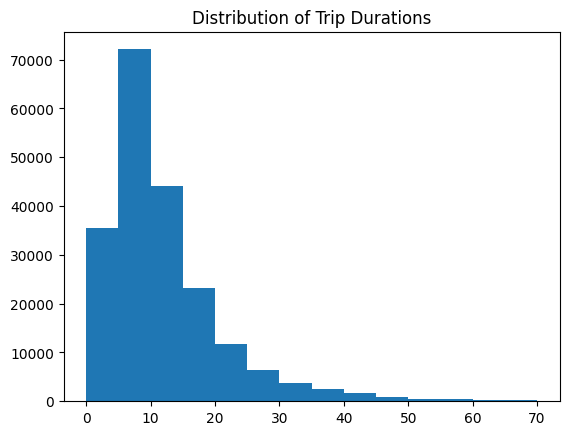

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of the trip durations
plt.hist(ridership_table['Trip  Duration'] / 60, bins=range(0, 75, 5))
plt.title('Distribution of Trip Durations')

In [8]:
one_station = bike_share_data.stations[list(bike_share_data.stations.keys())[0]]
print(one_station)
print(one_station.num_bikes)

BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=np.int64(84), num_bikes_t0=np.int64(7), num_bikes=<analysis.SparseSequence object at 0x76a38298a4e0>)


In [21]:
import folium
import pandas as pd
import numpy as np

def create_geojson_features(df):
    features = []
    N = 100
    # create a list of 10 random coordinates around [53.555, 9.9914] (Hamburg)
    coordsX = np.random.normal(loc=53.555, scale=0.03, size=N)
    coordsY = np.random.normal(loc=9.9914, scale=0.03, size=N)
    
    # for _, row in df.iterrows():
    initial_date = pd.to_datetime('1980-01-01')
    for day in range(10):
        date = initial_date + pd.DateOffset(days=day)
        for i in range(N):
            feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates': [coordsY[i], coordsX[i]] # [row['coordinatesX'],row['coordinatesY']]
            },
            'properties': {
                'time': str(pd.to_datetime(date)), # str(pd.to_datetime(row['fake_date'])),
                'style': {'color': ''}, 
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': "#ff0000",   #row["color"],
                    "weight" :0 ,
                    'fillOpacity': 0.7,
                    #'stroke': 'true',
                    'radius': 10 # row['average_res'] -5
                }
                }
            }
            features.append(feature)
    return features

features = create_geojson_features(None) # create_geojson_features(station_df)

from folium.plugins import TimestampedGeoJson

m = folium.Map(location=[53.555, 9.9914], zoom_start=11,prefer_canvas=True)
TimestampedGeoJson(features,
                   period = 'P1D',
                   duration = 'P1D',
                  #period = 'PT1H',
                  #duration = 'PT1H',
                  transition_time = 1000,
                   loop=True,
                  auto_play = True,
                  date_options=f"D -- HH:MM",
                  ).add_to(m)

print(features)
m

[{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [9.981845887450111, 53.52996221767005]}, 'properties': {'time': '1980-01-01 00:00:00', 'style': {'color': ''}, 'icon': 'circle', 'iconstyle': {'fillColor': '#ff0000', 'weight': 0, 'fillOpacity': 0.7, 'radius': 10}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [9.994408196599476, 53.54548812998282]}, 'properties': {'time': '1980-01-01 00:00:00', 'style': {'color': ''}, 'icon': 'circle', 'iconstyle': {'fillColor': '#ff0000', 'weight': 0, 'fillOpacity': 0.7, 'radius': 10}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [9.969013707729978, 53.5538069749073]}, 'properties': {'time': '1980-01-01 00:00:00', 'style': {'color': ''}, 'icon': 'circle', 'iconstyle': {'fillColor': '#ff0000', 'weight': 0, 'fillOpacity': 0.7, 'radius': 10}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [9.950565359048204, 53.581221163294835]}, 'properties': {'time': '1980-01-01 00:00:00', '